<a href="https://colab.research.google.com/github/Mohini-More/Machine-learning/blob/main/convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**convolutional Neural Network**

In [6]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf

In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [7]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16326956397316107025
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6373525481702252581
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [8]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


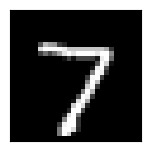

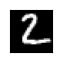

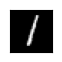

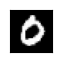

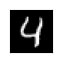

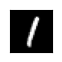

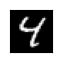

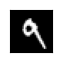

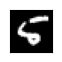

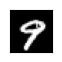

In [9]:
import matplotlib.pyplot as plt
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  plt.show()
  plt.close()

In [10]:
print('x_train shape',x_train.shape)
print('y_train shape',y_train.shape)
print('x_test shape',x_test.shape)
print('y_test shape',y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [11]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [12]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')


x_train /=255
x_test /=255


In [13]:
classes=10
y_train=to_categorical(y_train,classes)
y_test=to_categorical(y_test,classes)

#seeling update shape
print('x_train shape',x_train.shape)
print('y_train shape',y_train.shape)
print('x_test shape',x_test.shape)
print('y_test shape',y_test.shape)


x_train shape (60000, 28, 28, 1)
y_train shape (60000, 10)
x_test shape (10000, 28, 28, 1)
y_test shape (10000, 10)


**Building the CNN**

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [15]:
img_rows ,img_cols , channels=28,28,1
filters=[6,32,80,120]

classes=10

In [16]:
#create model
model=Sequential()
model.add(Conv2D(filters[0],(3,3),padding='same' , activation='relu' ,input_shape=(img_rows ,img_cols , channels) ))
model.add(MaxPooling2D(pool_size=(2,2))) #for reducing image size
#(dim + pad-kernel)/2 (28 +3 -3)/ 2 =14
model.add(Conv2D(filters[1],(2,2),padding='same' , activation='relu'  ))
model.add(MaxPooling2D(pool_size=(2,2)))
#(dim + pad-kernel)/2 (14+2 -2)/ 2 =7
model.add(Conv2D(filters[2],(2,2),padding='same' , activation='relu'  ))
model.add(MaxPooling2D(pool_size=(2,2)))
#(dim + pad-kernel)/2 (7+2 -2)/ 2 =3
model.add(Conv2D(filters[3],(2,2),padding='same' , activation='relu'  ))
model.add(MaxPooling2D(pool_size=(2,2)))
#(dim + pad-kernel)/2 (3+2 -2)/ 2 =1
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(classes,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        800       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 80)          10320     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 80)          0

**Training the CNN**

In [18]:
#training model
model.fit(x_train,y_train,validation_split=0.2, epochs=15, batch_size=64, verbose=1)

Epoch 1/15
750/750 [==============================] - 10s 6ms/step - loss: 1.8971 - accuracy: 0.4403 - val_loss: 1.0140 - val_accuracy: 0.6482
Epoch 2/15
750/750 [==============================] - 4s 6ms/step - loss: 0.4880 - accuracy: 0.8443 - val_loss: 0.2656 - val_accuracy: 0.9141
Epoch 3/15
750/750 [==============================] - 4s 6ms/step - loss: 0.2524 - accuracy: 0.9203 - val_loss: 0.1809 - val_accuracy: 0.9432
Epoch 4/15
750/750 [==============================] - 4s 5ms/step - loss: 0.1803 - accuracy: 0.9435 - val_loss: 0.1599 - val_accuracy: 0.9467
Epoch 5/15
750/750 [==============================] - 4s 5ms/step - loss: 0.1419 - accuracy: 0.9561 - val_loss: 0.1186 - val_accuracy: 0.9639
Epoch 6/15
750/750 [==============================] - 3s 4ms/step - loss: 0.1187 - accuracy: 0.9633 - val_loss: 0.1323 - val_accuracy: 0.9570
Epoch 7/15
750/750 [==============================] - 3s 4ms/step - loss: 0.1011 - accuracy: 0.9676 - val_loss: 0.0945 - val_accuracy: 0.9708
Epoch

**Testing model**

In [19]:
# import libraries
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# predict probabilities set train model
y_pred_probs = model.predict(x_test, verbose=0)
y_pred = np.where(y_pred_probs > 0.5 ,1,0)


# calculate & test accuracy using predict & true label
test_accuracy = accuracy_score(y_test,y_pred)
print('\n test accuracy:{}'.format(test_accuracy))


 test accuracy:0.9814


In [21]:
#define a mask selecting a range of indices(20 ,49)
mask =range(20,50)

#test set visualization
x_valid=x_train[0:20]
actual_labels =y_test[0:20]

#predict probabilities for validation sample
y_pred_probs_valid=model.predict(x_valid)
y_pred_valid=np.where(y_pred_probs_valid > 0.5 ,1,0)


1/1 [==============================] - 0s 19ms/step


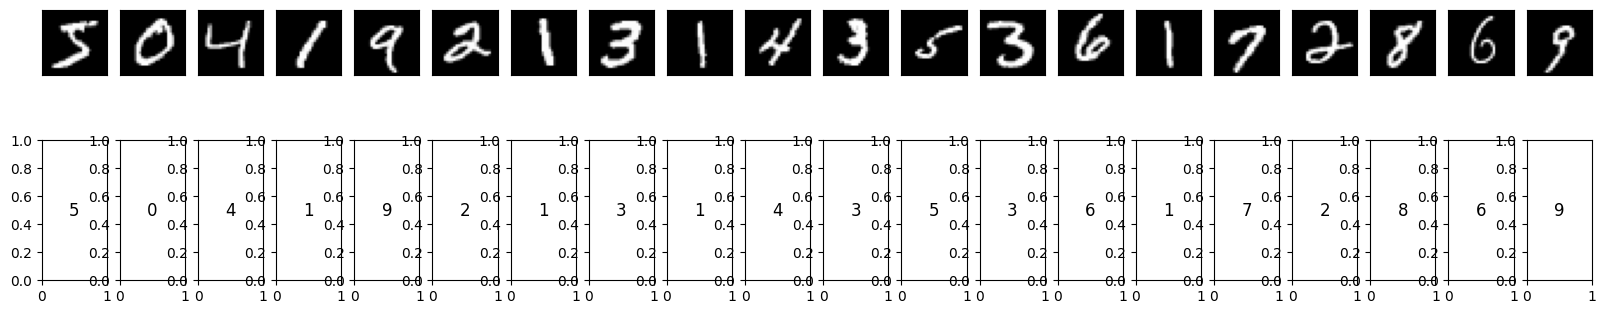

In [22]:
n =len(x_valid)
plt.figure(figsize=(20,4))
for i in range(n):
 ax=plt.subplot(2, n, i+1)
 plt.imshow(x_valid[i].reshape(28,28))


 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)


 predicted_digit=np.argmax(y_pred_probs_valid[i])
 ax =plt.subplot(2,n,i+1+n)
 plt.text(0.5,0.5,str(predicted_digit), fontsize=12, ha='center' , va='center')


plt.show()
plt.close()






